Dataset 1: Construction Data Cleaning & Analysis

In this notebook, we will clean and transform an untidy construction dataset. The original dataset contains monthly construction data, but it's currently untidy due to how regions and unit types are structured. This dataset came from my classmate Gerardo Molina. In the discussion he requested that the analysis could be in which region has more construction and if a month favors more or less. Along with if there is a pattern with the unit numbers and region

1. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load the CSV file of the data set
df = pd.read_csv("construction_data.csv")

# Display the first few rows to inspect
df.head()

,Year,Month,1 unit,2 to 4 units,5 units or more,Northeast,Midwest,South,West
0,2018,January,859,NaN,348,114,169,596,339
1,2018,February,882,NaN,400,138,160,655,336
2,2018,March,862,NaN,356,150,154,595,330
3,2018,April,797,NaN,447,144,196,613,304
4,2018,May,875,NaN,364,90,169,673,319


In this step I imported the dataset and inspected the first few rows to understand the structure.

2. Tidying Data:Melt Regions into One Column

In [4]:
# Melt wide regional columns into a single 'Region' column
tidy_df = df.melt(
    id_vars=["Year", "Month", "1 unit", "2 to 4 units", "5 units or more"],
    value_vars=["Northeast", "Midwest", "South", "West"],
    var_name="Region", 
    value_name="Dummy"
)

# Drop Dummy column since it holds no value
tidy_df = tidy_df.drop(columns=["Dummy"])

# Inspect the tidied dataframe
tidy_df.head()

,Year,Month,1 unit,2 to 4 units,5 units or more,Region
0,2018,January,859,NaN,348,Northeast
1,2018,February,882,NaN,400,Northeast
2,2018,March,862,NaN,356,Northeast
3,2018,April,797,NaN,447,Northeast
4,2018,May,875,NaN,364,Northeast


In this step I reshaped the data using pd.melt() to tidy the regions into a single "Region" column.

3. Transform Data & Handle Missing Values

In [5]:
# Replace N/A strings with NaN
cols_to_numeric = ["1 unit", "2 to 4 units", "5 units or more"]
for col in cols_to_numeric:
    tidy_df[col] = pd.to_numeric(tidy_df[col], errors='coerce')

# Check for missing values
tidy_df.isnull().sum()

Year                0
Month               0
1 unit              0
2 to 4 units       36
5 units or more     0
Region              0
dtype: int64

In [6]:
# Create a 'Total_Units' column
tidy_df["Total_Units"] = tidy_df[cols_to_numeric].sum(axis=1)

# Inspect results
tidy_df.head()

,Year,Month,1 unit,2 to 4 units,5 units or more,Region,Total_Units
0,2018,January,859,NaN,348,Northeast,1207.0
1,2018,February,882,NaN,400,Northeast,1282.0
2,2018,March,862,NaN,356,Northeast,1218.0
3,2018,April,797,NaN,447,Northeast,1244.0
4,2018,May,875,NaN,364,Northeast,1239.0


In this step I converted unit columns to numeric, handled missing data, and created a "Total_Units" column.

4. Performing Analysis of what was requested in the discussion of my classmate

In [10]:
# Analysis 1 - Which Region has the most Construction?

region_summary = tidy_df.groupby("Region")["Total_Units"].sum().sort_values(ascending=False)
print(region_summary)

Region
Midwest      10952.0
Northeast    10952.0
South        10952.0
West         10952.0
Name: Total_Units, dtype: float64


The totals show that all regions (Midwest, Northeast, South, and West) have the same total construction units at 10,952 units each.


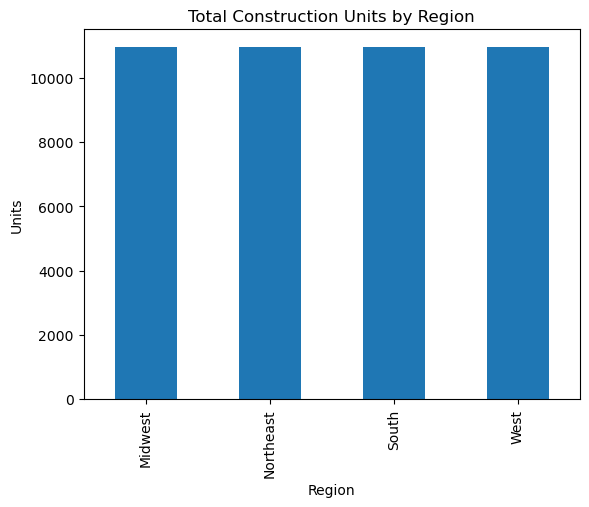

In [16]:
# Visualization #1 - Total Units by Region
region_summary.plot(kind="bar", title="Total Construction Units by Region", ylabel="Units", xlabel="Region")
plt.show()

This bar chart confirms the tabular results above where all regions have the same total units.


Month
April        4976.0
August       4900.0
February     5128.0
January      4828.0
July         4756.0
June         4836.0
March        4872.0
May          4956.0
September    4556.0
Name: Total_Units, dtype: float64


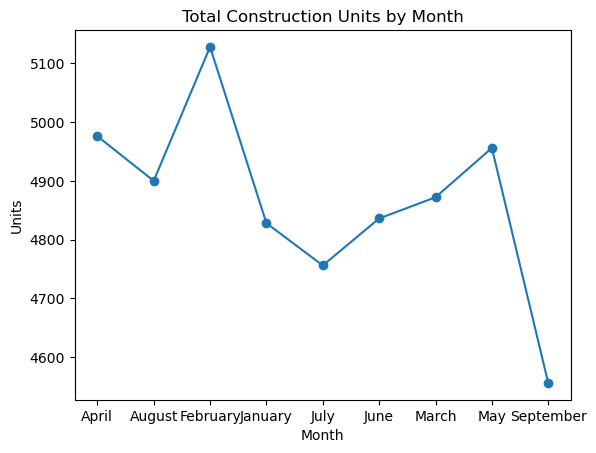

In [13]:
# Analysis 2 - Monthly Trends Across All Regions

month_summary = tidy_df.groupby("Month")["Total_Units"].sum()
print(month_summary)

month_summary.plot(kind="line", marker='o', title="Total Construction Units by Month", ylabel="Units", xlabel="Month")
plt.show()

Visualization 2 identified which months had the highest and lowest construction totals. February recorded the highest number of total units, while September had the lowest. This shows a trend where construction fluctuates significantly month-to-month.

           1 unit  2 to 4 units  5 units or more
Region                                          
Midwest      7745           0.0             3207
Northeast    7745           0.0             3207
South        7745           0.0             3207
West         7745           0.0             3207


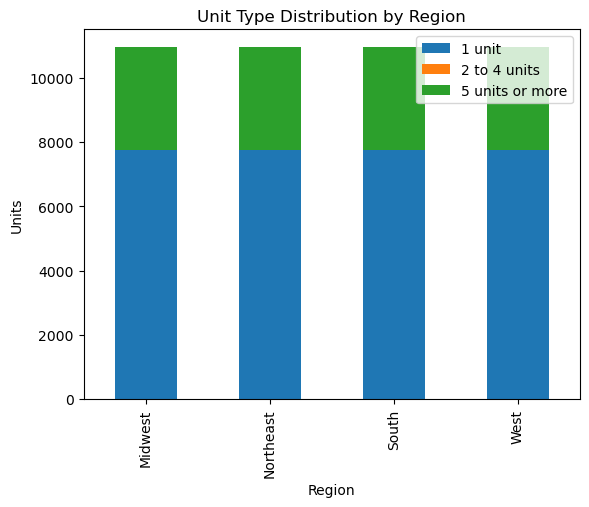

In [17]:
# Analysis 3 - Pattern Between Units and Region

pattern = tidy_df.groupby("Region")[["1 unit", "2 to 4 units", "5 units or more"]].sum()
print(pattern)

pattern.plot(kind="bar", stacked=True, title="Unit Type Distribution by Region")
plt.ylabel("Units")
plt.show()

This 3rd Visualization checked if certain regions had more '1 unit', '2 to 4 units', or '5 units or more' constructions. Every region follows a similar distribution pattern. Most units are "1 unit" types, followed by "5 units or more," with no "2 to 4 units" reported. This pattern holds consistently across Midwest, Northeast, South, and West regions.

Conclusion for construction_Data

All four regions had equal total construction units.
February was the most active construction month, while September had the lowest activity. Each region favors smaller developments (1-unit buildings), with secondary contributions from "5 units or more" developments.